






The problem statement is to build a polynomial regression model that can predict the sales of a product based on the advertising expenditures in the three mediums. This can help businesses to optimize their advertising budgets and determine the most effective advertising channel for promoting their product.

The dataset consists of 200 observations on the following four variables:

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

radio: advertising dollars spent on radio


newspaper: advertising dollars spent on newspaper


sales: sales of the product in a given market (in thousands of units)



Importing the libraries


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

Understanding the data


In [5]:
df = pd.read_csv('/content/advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
df.shape

(200, 4)

In [9]:
df.size

800

In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
num_cols =["TV", "Newspaper", "Radio", "Sales"] 

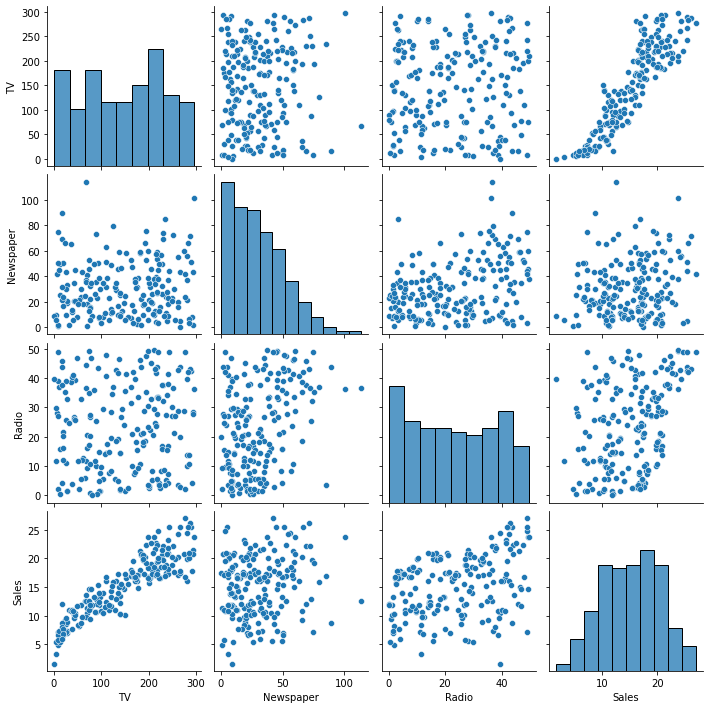

In [16]:
sns.pairplot(df[num_cols])

<Axes: xlabel='TV', ylabel='count'>

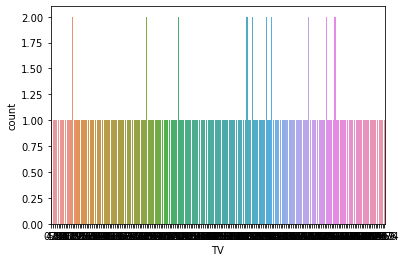

In [17]:
sns.countplot(x='TV',data=df)

<Axes: xlabel='Newspaper', ylabel='count'>

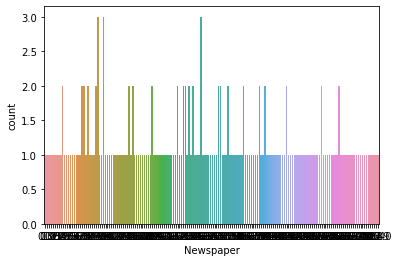

In [18]:
sns.countplot(x='Newspaper',data=df)

In [19]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [20]:
df["TV"].value_counts() 

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

In [21]:
df["Newspaper"].value_counts() 

9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: Newspaper, Length: 172, dtype: int64

In [22]:
df["Radio"].value_counts() 

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: Radio, Length: 167, dtype: int64

In [23]:
df["Sales"].value_counts() 

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [44]:
# Count the number of duplicated rows
duplicated_values = df.duplicated().sum()
print("Number of duplicated rows:", duplicated_values)

Number of duplicated rows: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1c46c4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1c46d1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1c46c4d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1c46d1a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1c46d1d30>],
 'means': []}

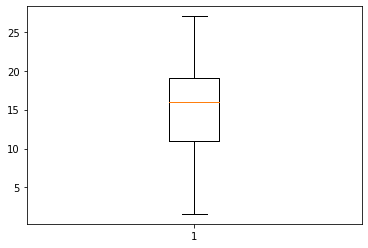

In [24]:
plt.boxplot(data=df,x="Sales")

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1c46b06a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1c46b0ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1c46b0400>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1c463e040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1c463e2e0>],
 'means': []}

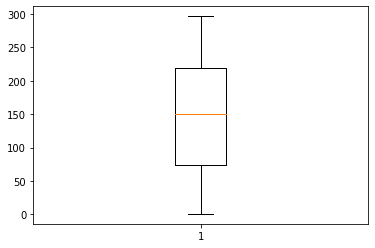

In [25]:
plt.boxplot(data=df,x="TV")

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1c71711f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1c712e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1c71bbf40>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1c7107460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1c6eb1940>],
 'means': []}

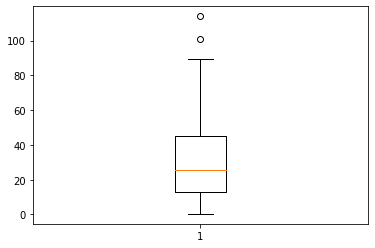

In [26]:
plt.boxplot(data=df,x="Newspaper")

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1c4d7f490>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1c4d874c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1c4d7f3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1c4df1370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1c4df1e80>],
 'means': []}

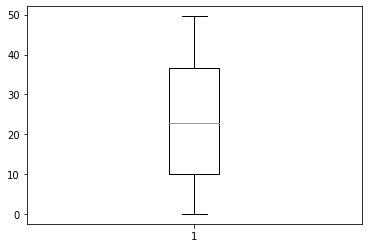

In [27]:
plt.boxplot(data=df,x="Radio")

<Axes: >

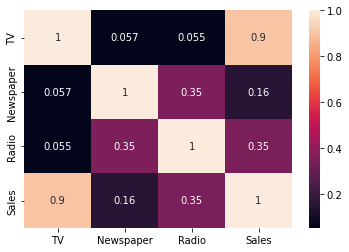

In [28]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [29]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [30]:
# Split the data into training and testing sets
train = df.sample(frac=0.8,random_state=123)
test = df.drop(train.index)

In [31]:
train

,TV,Radio,Newspaper,Sales
50,199.8,3.1,34.6,16.4
127,80.2,0.0,9.2,11.9
37,74.7,49.4,45.7,14.7
149,44.7,25.8,20.6,10.1
19,147.3,23.9,19.1,14.6
...,...,...,...,...
193,166.8,42.0,3.6,19.6
131,265.2,2.9,43.0,17.7
76,27.5,1.6,20.7,6.9
34,95.7,1.4,7.4,11.9


In [32]:
test

,TV,Radio,Newspaper,Sales
2,17.2,45.9,69.3,12.0
17,281.4,39.6,55.8,24.4
32,97.2,1.5,30.0,13.2
39,228.0,37.7,32.0,21.5
47,239.9,41.5,18.5,23.2
49,66.9,11.7,36.8,9.7
55,198.9,49.4,60.0,23.7
57,136.2,19.2,16.6,13.2
66,31.5,24.6,2.2,11.0
68,237.4,27.5,11.0,18.9


In [33]:
X_train = train.drop(['Sales'],axis=1)
y_train = train['Sales']
X_test = test.drop(['Sales'],axis=1)
y_test = test['Sales']

In [35]:
# define a function to generate polynomial features
def generate_poly_features(X, degree):
    poly_features = np.empty((X.shape[0], 0))
    for d in range(1, degree+1):
        poly_features = np.hstack((poly_features, np.power(X, d)))
    return poly_features

# define a function to fit polynomial regression
def fit_poly_reg(X, y, degree):
    X_poly = generate_poly_features(X, degree)
    # add intercept term
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
    # calculate coefficients
    beta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return beta

# define a function to predict using polynomial regression
def predict_poly_reg(X, beta, degree):
    X_poly = generate_poly_features(X, degree)
    # add intercept term
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
    # predict values
    y_pred = X_poly.dot(beta)
    return y_pred

In [36]:
# fit polynomial regression
degree = 2
beta = fit_poly_reg(X_train, y_train, degree)

# predict on test set
y_pred = predict_poly_reg(X_test, beta, degree)



In [37]:
# Calculate the mean squared error (MSE)
mse = np.mean((y_pred - y_test)**2)
print("Mean squared error:", mse)

Mean squared error: 2.4769467707510153
